In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline 
import yfinance as yf
import plotly.graph_objs as go

In [247]:
start_date = '2018-08-10'
end_date = '2024-09-08'

df = yf.download('AAPL', start=start_date, end=end_date)
#df.reset_index(inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.436649,98444800
2018-08-13,52.327499,52.737499,51.924999,52.217499,49.755863,103563600
2018-08-14,52.540001,52.639999,52.064999,52.437500,49.965485,82992000
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.082207,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,50.815907,114001600


In [248]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-10,51.840000,52.275002,51.667500,51.882500,49.436649,98444800
1,2018-08-13,52.327499,52.737499,51.924999,52.217499,49.755863,103563600
2,2018-08-14,52.540001,52.639999,52.064999,52.437500,49.965485,82992000
3,2018-08-15,52.305000,52.685001,52.082500,52.560001,50.082207,115230400
4,2018-08-16,52.937500,53.452499,52.867500,53.330002,50.815907,114001600


In [249]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.436649,98444800
2018-08-13,52.327499,52.737499,51.924999,52.217499,49.755863,103563600
2018-08-14,52.540001,52.639999,52.064999,52.437500,49.965485,82992000
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.082207,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,50.815907,114001600


In [250]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1528,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1.528000e+03
mean,2021-08-23 13:55:54.973822208,126.392227,127.807790,125.073025,126.499203,124.726172,1.004040e+08
min,2018-08-10 00:00:00,35.994999,36.430000,35.500000,35.547501,33.989899,2.404830e+07
25%,2020-02-18 18:00:00,71.029375,71.971878,70.141251,71.588125,69.644703,6.426458e+07
50%,2021-08-23 12:00:00,138.084999,141.055000,136.570000,138.360001,136.754768,8.722530e+07
75%,2023-03-01 06:00:00,169.582500,171.187500,168.232498,169.604996,168.401405,1.204639e+08
max,2024-09-06 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,4.265100e+08
std,NaN,52.319172,52.795181,51.860352,52.341831,52.699072,5.429472e+07


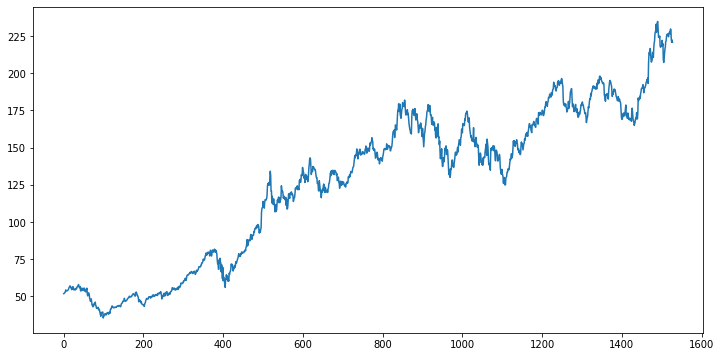

In [251]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df2['Close'])

plt.show()

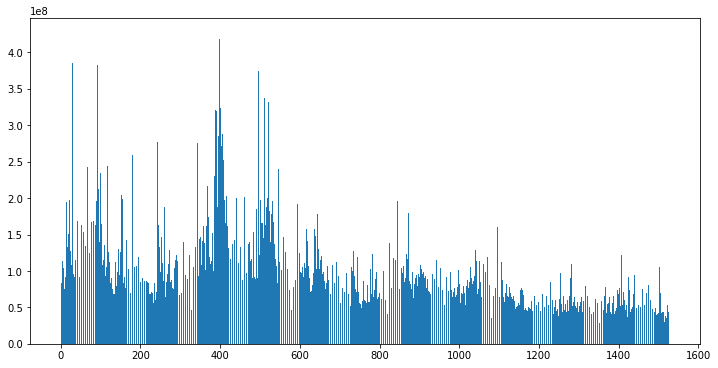

In [252]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'])
plt.show()

In [253]:
# data = list(df2["Close"])

In [254]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

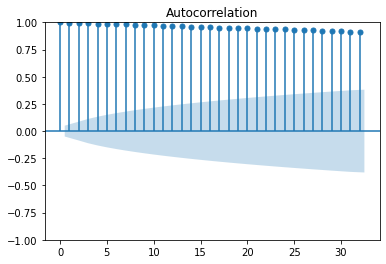

In [255]:
plot_acf(df2['Close'])
plt.show()

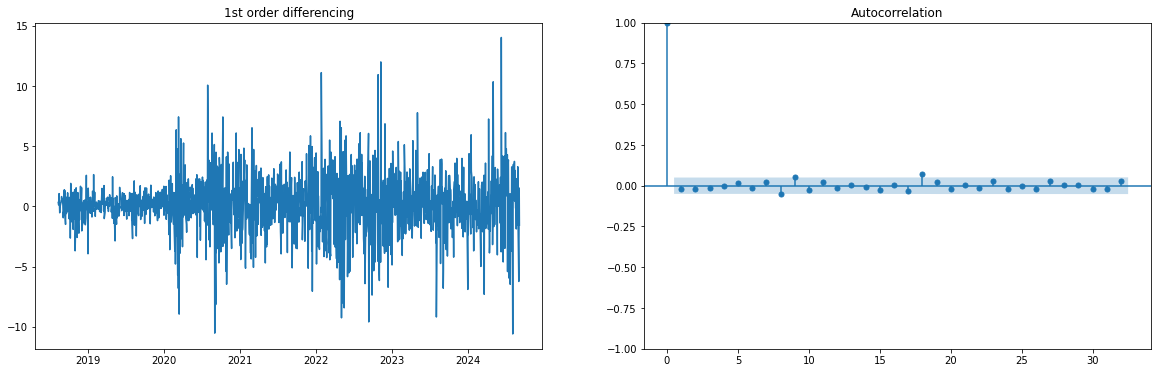

In [256]:
#differencing to calculate d value
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_acf(df2['Close'].diff().dropna(), ax=ax2)
plt.show()

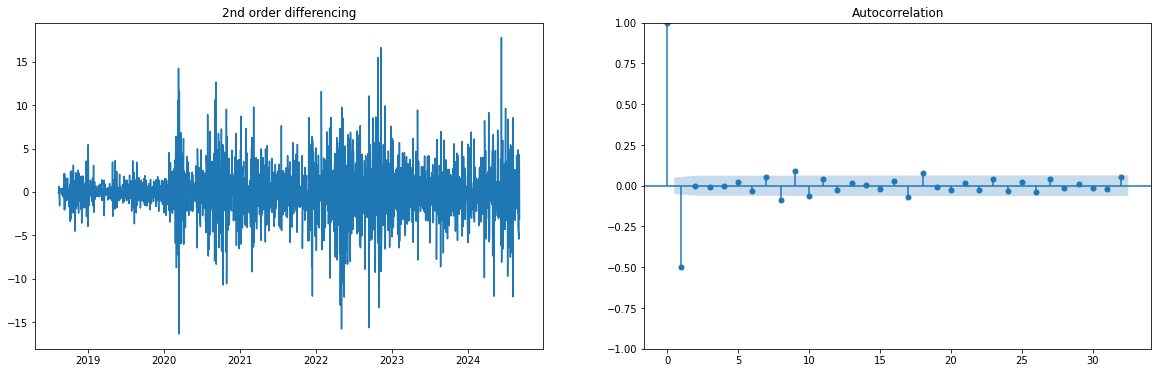

In [257]:
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df2['Close'].diff().diff())

ax2=f.add_subplot(122)
plot_acf(df2['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

In [258]:
# plot_pacf(df2['Close'])
# plt.show()

In [259]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(data)
# print("1. ADF : ",result[0])
# print("2. P-Value : ", result[1])
# print("3. Num Of Lags : ", result[2])
# print("4. Num Of Observations Used For ADF Regression:", result[3])
# print("5. Critical Values :")
# for key, val in result[4].items():
#   print("\t",key, ": ", val)

In [260]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2['Close'].dropna())
print("p-value : ",result[1])

result = adfuller(df2['Close'].diff().dropna())
print("p-Value : ", result[1])

result = adfuller(df2['Close'].diff().diff().dropna())
print("p-Value : ", result[1])

# print("Num Of Lags : ", result[1])

p-value :  0.8797120446901969
p-Value :  0.0
p-Value :  4.734292479070345e-27


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


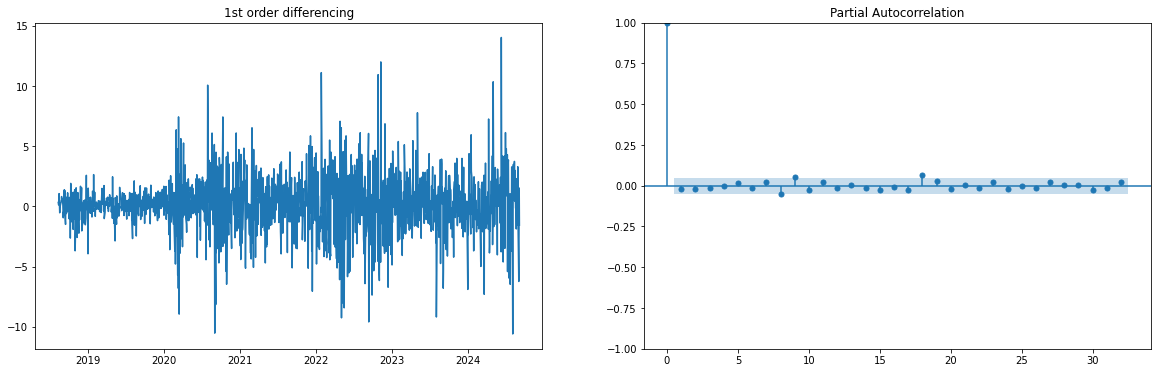

In [261]:
#partial autocorrelation differencing to calculate p value
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_pacf(df2['Close'].diff().dropna(), ax=ax2)
plt.show()

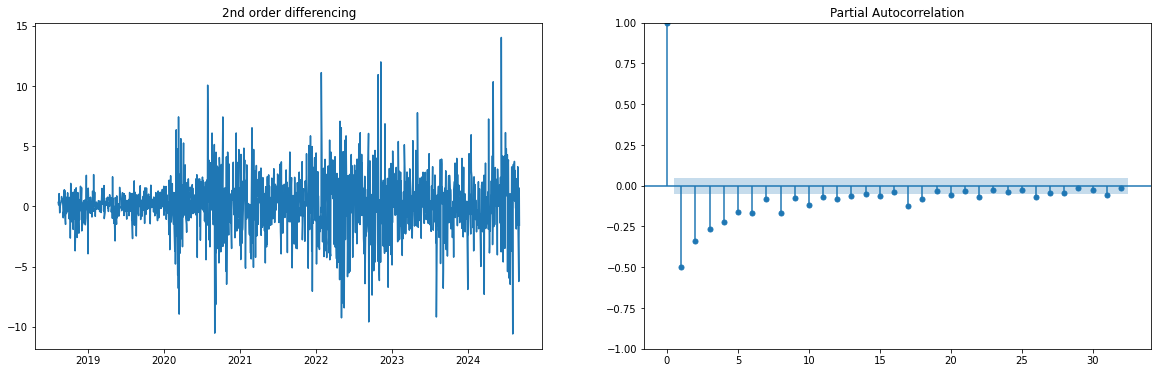

In [262]:
f=plt.figure(figsize=(20, 6))
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df2['Close'].diff())


ax2=f.add_subplot(122)
plot_pacf(df2['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

d=1, p=1, q=2

In [263]:
!pip install pmdarima

In [264]:
data = list(df2["Close"])

In [265]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [266]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [267]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1428 100


In [268]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7026.032, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7019.432, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7020.847, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7020.823, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7020.656, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7022.130, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.322 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1528
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3507.716
Date:                Sun, 08 Sep 2024   AIC                           7019.432
Time:                        19:10:49   BIC                           7030.095
Sample:                             0   HQIC                          7023.401
          

In [269]:
import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(data, order=(0,0,0)) #p, d, q

In [270]:
# model = sm.tsa.arima.ARIMA(data, order=(1,1,1))

In [271]:
model = sm.tsa.arima.ARIMA(data, order=(0,1,1))

In [272]:
# import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [273]:
model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1528
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3509.088
Date:                Sun, 08 Sep 2024   AIC                           7022.176
Time:                        19:10:49   BIC                           7032.838
Sample:                             0   HQIC                          7026.145
                               - 1528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0181      0.020     -0.921      0.357      -0.057       0.020
sigma2         5.8018      0.133     43.705      0.000       5.542       6.062
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               653.93
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [274]:
model.save('model.pkl')

In [275]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([172.75921001, 169.44106094, 168.02603734, 167.0578093 ,
       165.03718085, 165.82549093, 166.88057959, 168.98134878,
       169.87358174, 169.31036657, 173.42430099, 170.38591016,
       169.31962341, 172.96295908, 183.19178792, 181.73677979,
       182.38801083, 182.73364559, 184.53682763, 183.07686725,
       186.22212405, 187.4081687 , 189.67823064, 189.83707353,
       189.86940028, 191.01884281, 192.32595442, 190.9257584 ,
       186.95310425, 189.92530533, 189.98883648, 190.28455193,
       191.2718268 , 192.2323262 , 193.99751812, 194.34363729,
       195.84241662, 194.50461218, 196.84689981, 193.18733347,
       206.89771416, 212.95848528, 214.21685077, 212.52120643,
       216.59503709, 214.33164121, 209.76403946, 207.53109313,
       208.12899757, 209.053005  , 213.17416798, 214.0832779 ,
       210.6825703 , 216.64037264, 220.20442347, 221.52569089,
       226.25301064, 227.79169456, 228.66394275, 232.90201254,
       227.66634691, 230.48807175, 234.32931262, 234.81

In [276]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2024-04-16    172.759210
2024-04-17    169.441061
2024-04-18    168.026037
2024-04-19    167.057809
2024-04-22    165.037181
                 ...    
2024-08-30    229.730866
2024-09-03    229.013205
2024-09-04    222.882807
2024-09-05    220.886735
2024-09-06    222.353024
Length: 100, dtype: float64

In [277]:
# trace_actual = go.Scatter(x=df2.index[-100:], y=df2['Close'][-100:], mode='lines', name='Actual Stock Price')

# # Create a trace for the predicted price
# trace_predicted = go.Scatter(x=df2.index[-100:], y=s[-100:], mode='lines', name='Predicted Price')

# # Create the layout for the plot
# layout = go.Layout(title='Actual vs Predicted Stock Price',
#                    xaxis=dict(title='Date'),
#                    yaxis=dict(title='Price'),
#                    showlegend=True)

# # Create a figure with the traces and layout
# fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)

# # Show the plot
# fig.show()

<Axes: xlabel='Date'>

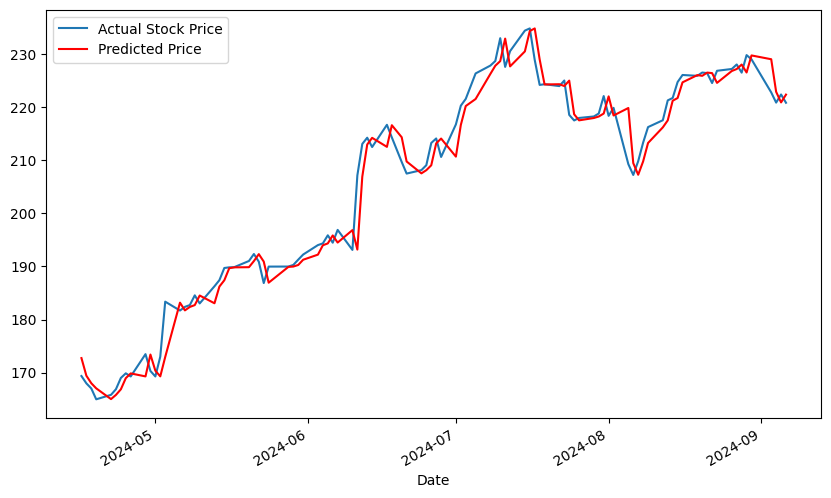

In [278]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True, color='red')

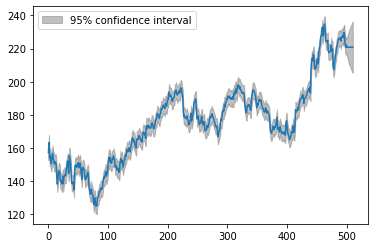

In [279]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(x_test,pred))

3.3201166779104936

In [281]:
np.sqrt(mean_absolute_error(x_test,pred))

1.5473709232387864

In [282]:
# residuals = x_test - pred
# covariance_matrix = np.cov(residuals, rowvar=False)
# print("Covariance Matrix:")
# print(covariance_matrix)

In [283]:


# mse = mean_squared_error(test_data, pred)
# print('Mean Squared Error (MSE):', mse)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(test_data, pred)
# print('Mean Absolute Error (MAE):', mae)

# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)
# print('Root Mean Squared Error (RMSE):', rmse)

In [284]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.973547163843489

Predicting Future 10 values:

In [285]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([222.35302423, 220.84770614, 220.84770614, 220.84770614,
       220.84770614, 220.84770614, 220.84770614, 220.84770614,
       220.84770614, 220.84770614, 220.84770614])

In [286]:
import datetime
start_date = datetime.datetime(2024,9,8)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [287]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2024-09-08    222.353024
2024-09-09    220.847706
2024-09-10    220.847706
2024-09-11    220.847706
2024-09-12    220.847706
2024-09-13    220.847706
2024-09-14    220.847706
2024-09-15    220.847706
2024-09-16    220.847706
2024-09-17    220.847706
2024-09-18    220.847706
dtype: float64

In [288]:
# trace_actual = go.Scatter(x=df2.index[-300:], y=df2['Close'][-300:], mode='lines', name='Actual Stock Price')

# # Shift the x-values for the future predicted price trace
# future_index = df2.index[-300:] + pd.DateOffset(days=len(df2) - 300)
# trace_future_predicted = go.Scatter(x=future_index, y=pred_future2, mode='lines', name='Future Predicted Price')

# # Create the layout for the plot
# layout = go.Layout(
#     title='Actual vs Future Predicted Stock Price',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Price'),
#     showlegend=True
# )

# # Create a figure with the traces and layout
# fig = go.Figure(data=[trace_actual, trace_future_predicted], layout=layout)

# # Show the plot
# fig.show()

<Axes: xlabel='Date'>

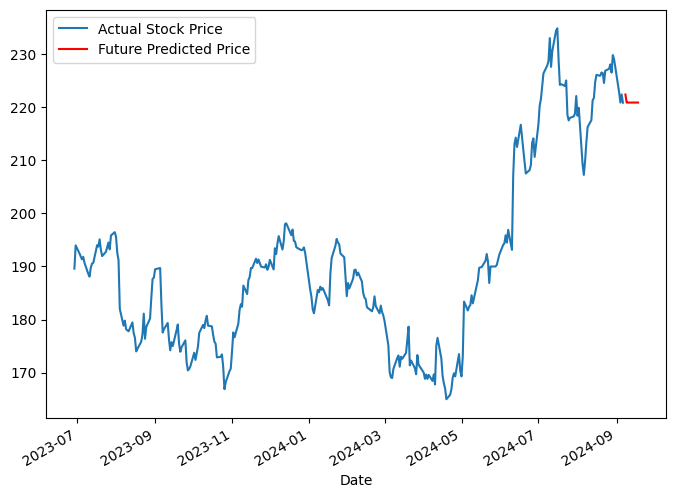

In [289]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=8,6
plt.figure(dpi=100)
df2['Close'][-300:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True, color='red')

In [290]:
start_date = '2024-09-01'
end_date = '2024-09-18'

check_df = yf.download('AAPL', start=start_date, end=end_date)
check_df.reset_index(inplace=True)
check_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600
1,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
2,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
3,2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48388600


In [291]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [292]:
check_df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48388600


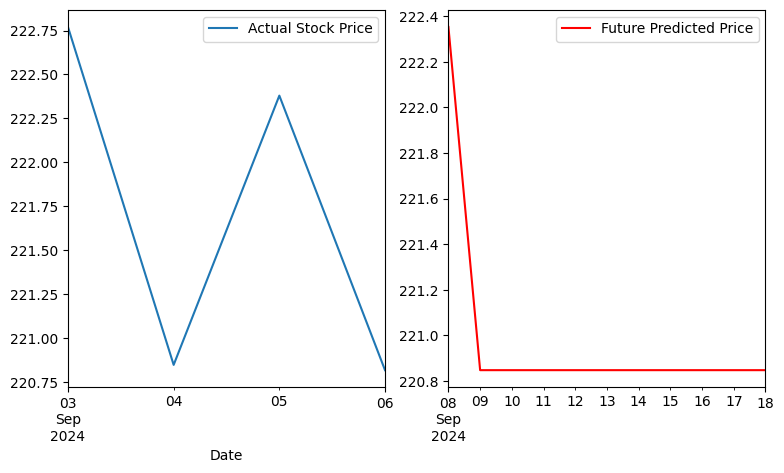

In [293]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 2)
pred_future2.plot(label='Future Predicted Price', legend=True, color='red')
plt.subplot(1, 2, 1)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()

In [294]:
# from plotly.subplots import make_subplots
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Future Predicted Price", "Actual Stock Price"))


# # Add the trace for Actual Stock Price to the second subplot
# trace_actual = go.Scatter(x=check_df2.index, y=check_df2['Close'], mode='lines', name='Actual Stock Price')
# fig.add_trace(trace_actual, row=1, col=1)

# # Add the trace for Future Predicted Price to the first subplot
# trace_predicted = go.Scatter(x=pred_future2.index, y=pred_future2, mode='lines', name='Future Predicted Price', line=dict(color='orange'))
# fig.add_trace(trace_predicted, row=1, col=2)

# # Update the layout of the figure
# fig.update_layout(title_text="Future Predicted Price vs Actual Stock Price", showlegend=True)

# # Show the plot
# fig.show()